In [4]:
# 5_model_evaluation.ipynb

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

In [5]:

# Load dataset
df = pd.read_csv("transformed_supply_chain.csv")
df['date'] = pd.to_datetime(df['date'])

In [6]:

# Filter for one SKU
sku_id = "SKU_001"
sku_df = df[df['SKU'] == sku_id][['date', 'Number of products sold']]
sku_df = sku_df.rename(columns={"date": "ds", "Number of products sold": "y"})

In [7]:

# Train/test split (e.g., last 12 weeks as test)
train_df = sku_df.iloc[:-12]
test_df = sku_df.iloc[-12:]

In [8]:

# Train Prophet
model = Prophet()
model.fit(train_df)

12:00:50 - cmdstanpy - INFO - Chain [1] start processing
12:00:51 - cmdstanpy - INFO - Chain [1] done processing


In [9]:

# Forecast for test period
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Align prediction and actuals
pred = forecast[['ds', 'yhat']].set_index('ds').join(test_df.set_index('ds'), how='inner')

In [10]:

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(pred['y'], pred['yhat']))
mae = mean_absolute_error(pred['y'], pred['yhat'])
mape = np.mean(np.abs((pred['y'] - pred['yhat']) / pred['y'])) * 100

In [11]:

print(f"📉 RMSE: {rmse:.2f}")
print(f"📊 MAE: {mae:.2f}")
print(f"🔍 MAPE: {mape:.2f}%")

📉 RMSE: 7.13
📊 MAE: 6.37
🔍 MAPE: 9.96%


<Axes: title={'center': 'Actual vs Forecasted Sales'}, xlabel='ds'>

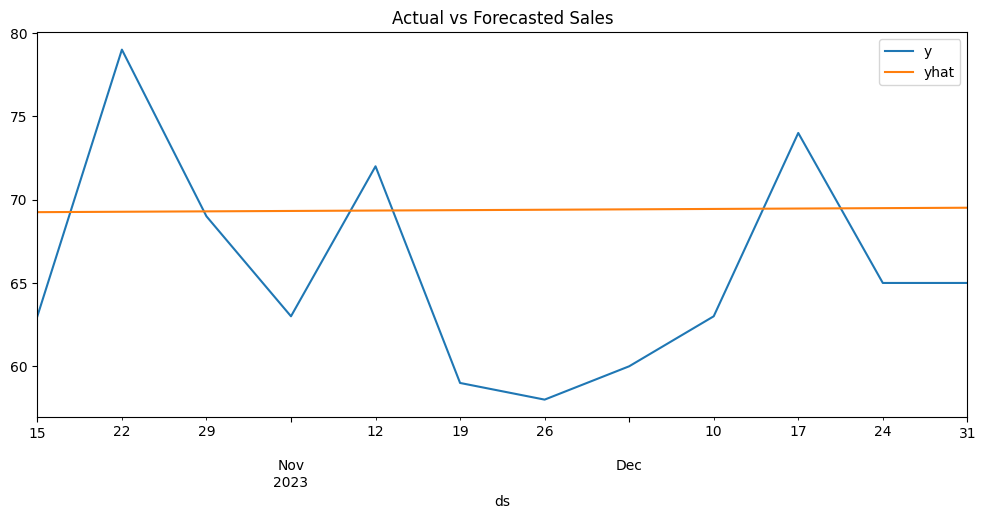

In [12]:

# Plot predictions vs actuals
pred.reset_index(inplace=True)
pred.plot(x='ds', y=['y', 'yhat'], figsize=(12, 5), title='Actual vs Forecasted Sales')
